## Assignment - A4.part2
### Devin Hall, Tyler Birnie
### Due: 4-3-22 @ 11:59pm
Some pre-requisites we will need for this project

In [187]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler

import gapstat


### Question 1: NBA Data

#### Question 1A: 
Load the data of NAB plays in the 2018-2019 season.
First, filter the players to only consider those who have played in more than 20 games. The analysis will ignore the first 7 columns as well as ignore the columns of statistics of percentages (FG%, 3P%, 2P%,eFG%,FT%)

In [188]:
# Load the PDF
nba_df = pd.read_csv ('nba18-19.csv')
nba_df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines\abrinal01,SG,25,OKC,31,2,19.0,1.8,5.1,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy\acyqu01,PF,28,PHO,10,0,12.3,0.4,1.8,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams\adamsja01,PG,22,ATL,34,1,12.6,1.1,3.2,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams\adamsst01,C,25,OKC,80,80,33.4,6.0,10.1,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo\adebaba01,C,21,MIA,82,28,23.3,3.4,5.9,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


In [189]:
# Now filter out to players who have games played > 20
GAMES_PLAYED_THRESHOLD = 20
players_with_20plus_games = nba_df['G'] > GAMES_PLAYED_THRESHOLD
# Create a new dataframe with the filtered players
df_players_20plus_games = nba_df[players_with_20plus_games]

# Now since our analysis is ignoring the first 7 columns and all percentage stats, we can filter those out as well
COLUMNS_WANTED = [
    'MP',  # The 8th column (Minutes Played)
    'FG', # Field Goals
    'FGA', # Field Goal Attempts
    '3P', # 3 Point Field Goals
    '3PA', # 3 Point Field Goal Attempts
    '2P', # 2 Point Field Goals
    '2PA', # 2 Point Field Goal Attempts
    'FT', # Free Throw
    'FTA', # Free Throw Attempts
    'ORB', # Offensive Rebound
    'DRB', # Defensive Rebound
    'TRB', # Total Rebound
    'AST', # Assists
    'STL', # Steals
    'BLK', # Blocks
    'TOV', # Turnovers
    'PF', # Personal Fouls
    'PTS', # Points

]

# Create a new DF that is filtered to the columns we want to analyze
df_players_20plus_games_filtered = df_players_20plus_games[COLUMNS_WANTED]
df_players_20plus_games_filtered.head()

,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,19.0,1.8,5.1,1.3,4.1,0.5,1.0,0.4,0.4,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
2,12.6,1.1,3.2,0.7,2.2,0.4,1.1,0.2,0.3,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,33.4,6.0,10.1,0.0,0.0,6.0,10.1,1.8,3.7,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,23.3,3.4,5.9,0.0,0.2,3.4,5.7,2.0,2.8,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
7,33.2,8.4,16.3,0.1,0.5,8.3,15.8,4.3,5.1,3.1,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3


#### Question 1B:
The features have different ranges, therefore we should scale the date before considering the clustering analysis. Scal the data using min-max normalization with range of [0,1]

Python- MinMaxScaler from sklearn.preprocessing

In [190]:
from sklearn.preprocessing import MinMaxScaler

# Define our minmax scaler from sklearn
minmax_scaler = MinMaxScaler()

# Now apply scaling
df_players_20plus_games_filtered.loc[:] = minmax_scaler.fit_transform(df_players_20plus_games_filtered.loc[:])
df_players_20plus_games_filtered.head()

C:\Users\itsla\AppData\Local\Temp\ipykernel_44392\3280644172.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_players_20plus_games_filtered.loc[:] = minmax_scaler.fit_transform(df_players_20plus_games_filtered.loc[:])


,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0.459215,0.150943,0.184874,0.254902,0.310606,0.053763,0.049080,0.041237,0.036364,0.018868,0.093458,0.060000,0.056075,0.227273,0.074074,0.081633,0.382353,0.125000
2,0.265861,0.084906,0.105042,0.137255,0.166667,0.043011,0.055215,0.020619,0.027273,0.037736,0.093458,0.080000,0.177570,0.181818,0.037037,0.142857,0.264706,0.065341
3,0.894260,0.547170,0.394958,0.000000,0.000000,0.645161,0.607362,0.185567,0.336364,0.905660,0.392523,0.593333,0.149533,0.681818,0.370370,0.326531,0.647059,0.369318
4,0.589124,0.301887,0.218487,0.000000,0.015152,0.365591,0.337423,0.206186,0.254545,0.358491,0.457944,0.446667,0.205607,0.409091,0.296296,0.285714,0.617647,0.227273
7,0.888218,0.773585,0.655462,0.019608,0.037879,0.892473,0.957055,0.443299,0.463636,0.566038,0.532710,0.573333,0.224299,0.227273,0.481481,0.346939,0.529412,0.579545


#### Question 1C:
Run Kmeans clustering on the data with k=2, ..., 10. For each value of k, keep track of the within-cluster variation. This quantity is referred to as different terms such as "inertia" and total "within-cluster sum-of-squares"

Python - KMeans from sklearn.cluster.

Plot the within-cluster variation vs the values of k.
As discussed the value is always decreasing, therefore it is difficult to use for selecting the _best_ value of k.

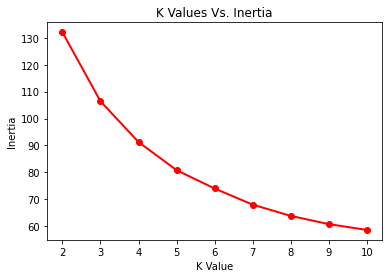

In [191]:
from sklearn.cluster import KMeans

# Define some lists to use to make the graph
# K values
k_values = [k for k in range(2, 11)]
# The inertia values that are parallel with k_values
inertia_values = []

# Now from k = 2 -> 10,
for k in k_values:
    # Define our KMeans cluster
    k_means = KMeans(n_clusters=k)

    # Fit it to our data
    k_means.fit(df_players_20plus_games_filtered.copy())

    # Append the inertia we got, since we are going in order we can simply just append the value
    # It will perfectly line up with k
    inertia_values.append(k_means.inertia_)

# Now that we have our x and y axis, we can make a plot
plt.plot(k_values, inertia_values, 'ro-', linewidth=2)
plt.title('K Values Vs. Inertia')
plt.xlabel('K Value')
plt.ylabel('Inertia')
plt.show()

#### Question 1D:
Determine the "best" number of clusters using gap statistic. 
Python- gapstat.py available on Canvas with B1=50.

In [192]:
# Determine the Best K value with B1=50
# TODO: doesnt work :(
best_k, _ = gapstat.gapstat(df_players_20plus_games_filtered.copy(), B1=50, max_k=20)
print(f"The best number of clusters using gap statistic is {best_k}")

The best number of clusters using gap statistic is 14


In [193]:
from gapstat import gapstat
from sklearn.cluster import AgglomerativeClustering

X = df_players_20plus_games_filtered.copy()

max_k = 20

# cluster the data set using the gapstat algorithm
n_clusters, labels, stats = gapstat(X, clusterer=AgglomerativeClustering(),
                                    max_k=max_k, calcStats=True)


# load stats into a pandas dataframe
stats_df = pd.DataFrame(data=stats["data"], index=stats["index"], columns=stats["columns"])
#print(stats_df)


infl = np.gradient(stats_df["Gap"],stats_df["Std Err"])


print(infl)
    

[ 2.02991556e+02 -6.44537840e+02 -3.26322606e+02 -2.85161878e+02
 -2.38236686e+02  2.30998773e+03  1.08730884e+02  1.47284703e+01
 -3.44073346e+01 -1.61812716e+01 -7.05687969e+00 -2.45486894e+02
  5.32665910e+00 -1.21052232e+01 -1.49725273e+01 -1.75075156e+01
 -1.86790099e+01 -1.31449183e+01  2.50452230e+01  1.56971965e+01
 -1.64276218e+00]


Text(0, 0.5, 'Gap')

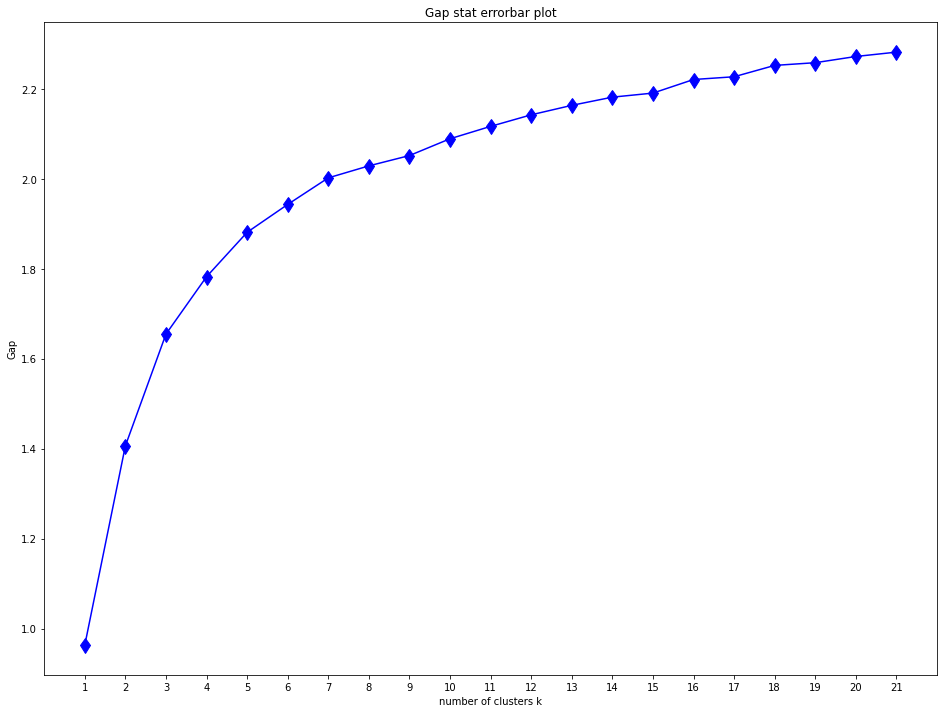

In [194]:
plt.figure(figsize=(16, 12))  

plt.title("Gap stat errorbar plot")  


plt.errorbar(stats_df.index, stats_df["Gap"], yerr=stats_df["Std Err"], capsize=5, color='blue', 
             linewidth=1.5, uplims=True, lolims=True,label='uplims=True, lolims=True')
plt.xticks(range(1,(max_k+2)))
plt.xlabel('number of clusters k')
plt.ylabel('Gap')

#### Question 1E: 
Create a data frame with the mean skill values (centers) of each group, using the best number of groups determined in (d), as a table or data frame. 

You may want to run Kmeans again with the best value of k.

Print out the statistics for each group (rows) and columns of "MP',"FG","3P", and "FT".

In [195]:
# Define our KMeans cluster
k_means = KMeans(n_clusters=best_k)

# Fit it to our data, we also need a new DF using only the 4 columns we want
_1e_filtered_df = df_players_20plus_games_filtered[["MP", "FG", "3P", "FT"]]
k_means.fit(_1e_filtered_df.copy())

# A list matching index to respective group
index_to_group = k_means.predict(_1e_filtered_df)

# Total stats of groups, index matches a group
group_stats_total = []

for x in range(best_k):
    group_stats_total.append([0, 0, 0, 0])

# Loop through all the data
i = 0
for row, data in _1e_filtered_df.iterrows():
    group = index_to_group[i]
    mp = data['MP']
    fg = data['FG']
    tp = data['3P']
    ft = data['FT']

    group_stats_list = group_stats_total[group]
    group_stats_list[0] += mp
    group_stats_list[1] += fg
    group_stats_list[2] += tp
    group_stats_list[3] += ft

    i += 1


# Now that all totals are added, divide by number of members per group
group_stats_average = []
for i, group_data in enumerate(group_stats_total):

    # Calculate how many members are in this group/cluster
    num_members = 0
    for group_index in index_to_group:
        if group_index == i:
            num_members += 1

    # Add to the list with the average of the stats
    group_stats_average.append([
        group_data[0] / num_members,
        group_data[1] / num_members,
        group_data[2] / num_members,
        group_data[3] / num_members,
    ])


# Now make a dataframe
avg_stats_df = pd.DataFrame(group_stats_average, columns=['Avg MP', 'Avg FG', 'Avg 3P', 'Avg FT'])
print(avg_stats_df)

      Avg MP    Avg FG    Avg 3P    Avg FT
0   0.559063  0.275708  0.197059  0.117784
1   0.862598  0.587547  0.457255  0.296082
2   0.414879  0.223585  0.049020  0.109794
3   0.746069  0.489598  0.273002  0.227068
4   0.627616  0.400419  0.055919  0.206949
5   0.929270  0.791898  0.429066  0.493026
6   0.728722  0.317176  0.254902  0.135798
7   0.116031  0.079304  0.042892  0.041881
8   0.284629  0.143225  0.092097  0.073102
9   0.861027  0.758255  0.154412  0.588918
10  0.967774  0.899371  0.895425  0.666667
11  0.708515  0.356744  0.420479  0.125620
12  0.439093  0.210929  0.217536  0.080140
13  0.836211  0.630728  0.081232  0.320324


#### Question 1F:
Report the same statistics as in (e), but using the original data scaling (reverse the scalling back to the original data range).

In [196]:
# Define our KMeans cluster
k_means = KMeans(n_clusters=best_k)

# Fit it to our data, we also need a new DF using only the 4 columns we want
_1f_filtered_df = df_players_20plus_games[["MP", "FG", "3P", "FT"]]
k_means.fit(_1f_filtered_df.copy())

# A list matching index to respective group
index_to_group = k_means.predict(_1f_filtered_df)

# Total stats of groups, index matches a group
group_stats_total = []

for x in range(best_k):
    group_stats_total.append([0, 0, 0, 0])

# Loop through all the data
i = 0
for row, data in _1f_filtered_df.iterrows():
    group = index_to_group[i]
    mp = data['MP']
    fg = data['FG']
    tp = data['3P']
    ft = data['FT']

    group_stats_list = group_stats_total[group]
    group_stats_list[0] += mp
    group_stats_list[1] += fg
    group_stats_list[2] += tp
    group_stats_list[3] += ft

    i += 1


# Now that all totals are added, divide by number of members per group
group_stats_average = []
for i, group_data in enumerate(group_stats_total):

    # Calculate how many members are in this group/cluster
    num_members = 0
    for group_index in index_to_group:
        if group_index == i:
            num_members += 1

    # Add to the list with the average of the stats
    group_stats_average.append([
        group_data[0] / num_members,
        group_data[1] / num_members,
        group_data[2] / num_members,
        group_data[3] / num_members,
    ])


# Now make a dataframe
avg_stats_df = pd.DataFrame(group_stats_average, columns=['Avg MP', 'Avg FG', 'Avg 3P', 'Avg FT'])
print(avg_stats_df)

       Avg MP    Avg FG    Avg 3P    Avg FT
0   31.474074  6.644444  1.840741  3.085185
1   16.025714  2.185714  0.625714  0.874286
2   20.852500  2.957500  0.872500  1.087500
3   10.537931  1.593103  0.365517  0.620690
4   26.767742  5.470968  1.164516  2.625806
5   34.731250  9.237500  2.450000  5.868750
6    6.500000  0.835000  0.160000  0.365000
7   18.467391  2.613043  0.773913  0.982609
8   26.212500  3.537500  1.353125  1.365625
9   13.615556  1.835556  0.460000  0.746667
10  32.730000  4.010000  1.830000  1.500000
11  29.141667  4.569444  1.391667  1.613889
12  23.321875  3.493750  1.050000  1.225000
13  34.090476  7.423810  1.366667  3.304762


#### Question 1G:
Apply PCA to the filtered nba data (make sure to apply the necessary scaling for running PCA). Plot the data in the first two principal components, colored by the best group lables found in (e).

Text(0, 0.5, 'Principle Component 2')

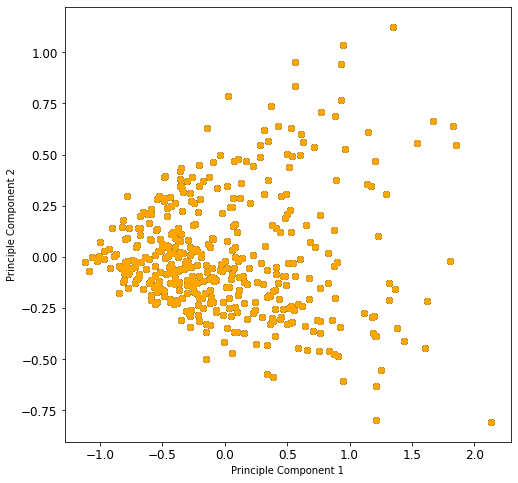

In [197]:
from sklearn.decomposition import PCA

#Obtain principal components
pca = PCA().fit(df_players_20plus_games_filtered)

pc = pca.transform(df_players_20plus_games_filtered)
pc1 = pc[:,0]
pc2 = pc[:,1]

colors = ['red', 'blue', 'green', 'orange']
cols = ['Avg MP', 'Avg FG', 'Avg 3P', 'Avg FT']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

#Plot principal components

for color, col in zip(colors, cols):
    plt.scatter(pc1, pc2, c=color)

plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')

### Question 2: Music Data

For this problem you will consider several properties that have been measured from music recording.

#### Question 2A: 
load the data from music2.csv. Consider only the numeric variables from the data in music2.csv

In [198]:
#load music2.csv
df = pd.read_csv('music2.csv')

#make a copy for later
df2 = df

#drop columns not interested in
df_filter = df.drop(columns=['Song','Artist','Type'])

df_filter.head()

,LVar,LAve,LMax,LFEner,LFreq
0,17600755.6,-90.006867,29921,105.92095,59.57379
1,9543020.9,-75.766719,27626,102.83616,58.48031
2,9049481.5,-98.062924,26372,102.32488,124.59397
3,7557437.3,-90.471062,28898,101.61648,48.76513
4,6282285.6,-88.952631,27940,100.30076,74.02039


#### Questin 2B:
Standardize the variables

In [199]:
#initialize standardScaler
scale= StandardScaler()
 
# separate the independent and dependent variables
X_data = df_filter
target = df2.drop(columns=['Song','LVar','LAve','LMax','LFEner','LFreq'])
 
# standardization of dependent variables
scaled_data = scale.fit_transform(X_data) 
#print(scaled_data)
#print(target)

#### Quesiton 2C:
Perform hierachial clustering with single,complete,average linkage

In [200]:
#create linkage for single, complete, average
s_link = linkage(scaled_data, method='single')
c_link = linkage(scaled_data, method='complete')
a_link = linkage(scaled_data, method='average')

#### Question 2D:
Report out the results in a dendrogram. Label the clusters by "Type" of music

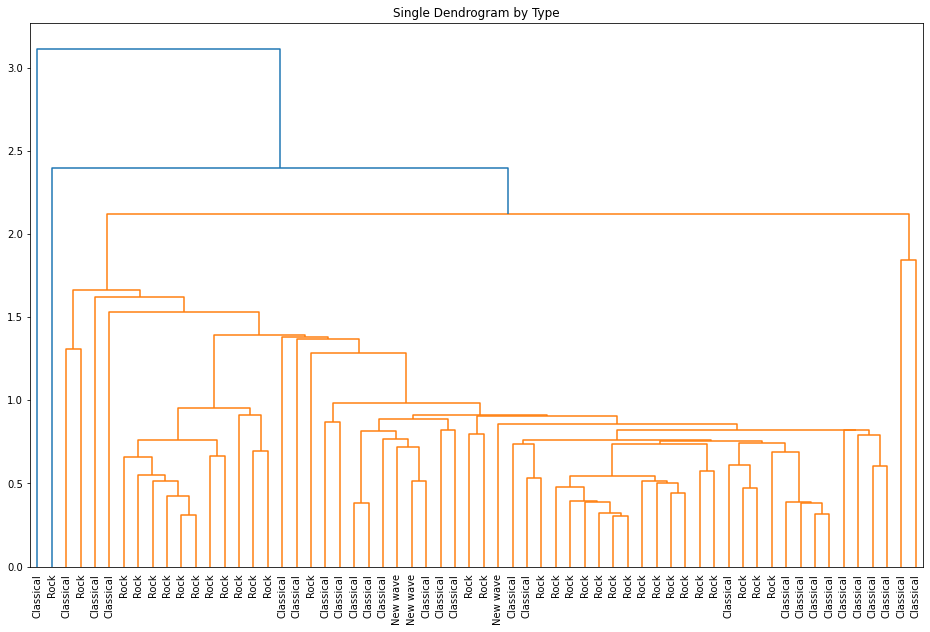

In [201]:
#set target index to "Type"
df=target.set_index('Type')

#plot 1D dendrogram single linkage by type
plt.figure(figsize=(16, 10))  
plt.title("Single Dendrogram by Type")  
S=dendrogram(s_link,labels=df.index,leaf_font_size=10)

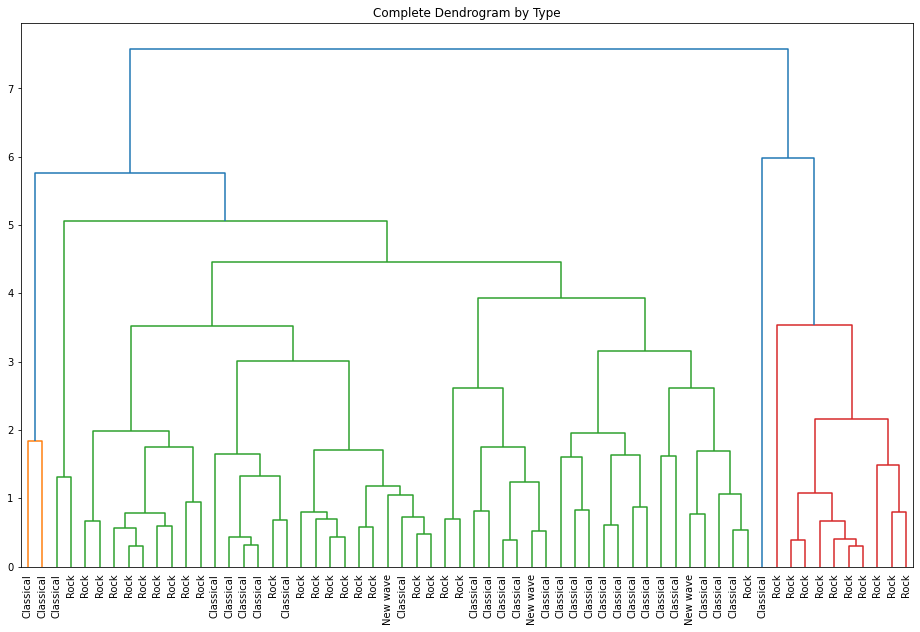

In [202]:
#plot 2D dendrogram complete linakge by type
plt.figure(figsize=(16, 10))  
plt.title("Complete Dendrogram by Type")  
C=dendrogram(c_link,labels=df.index,leaf_font_size=10)

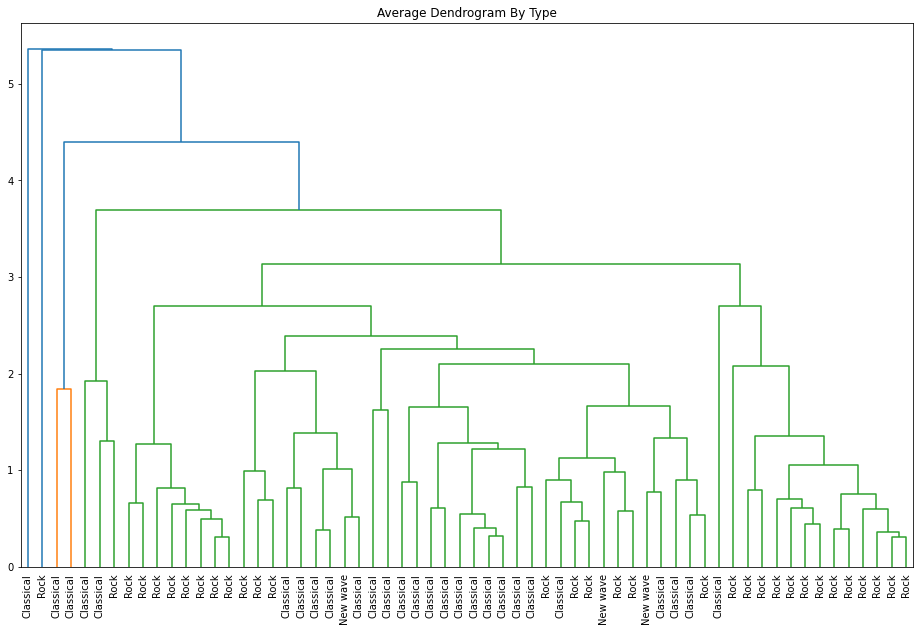

In [203]:
#plot 3D dendrogram average linkage by type
plt.figure(figsize=(16, 10))  
plt.title("Average Dendrogram By Type")  
A=dendrogram(a_link, labels=df.index, leaf_font_size=10)

#### Question 2E:
Report out the results of the dendrogram, but label the samples by the musical "Artist"

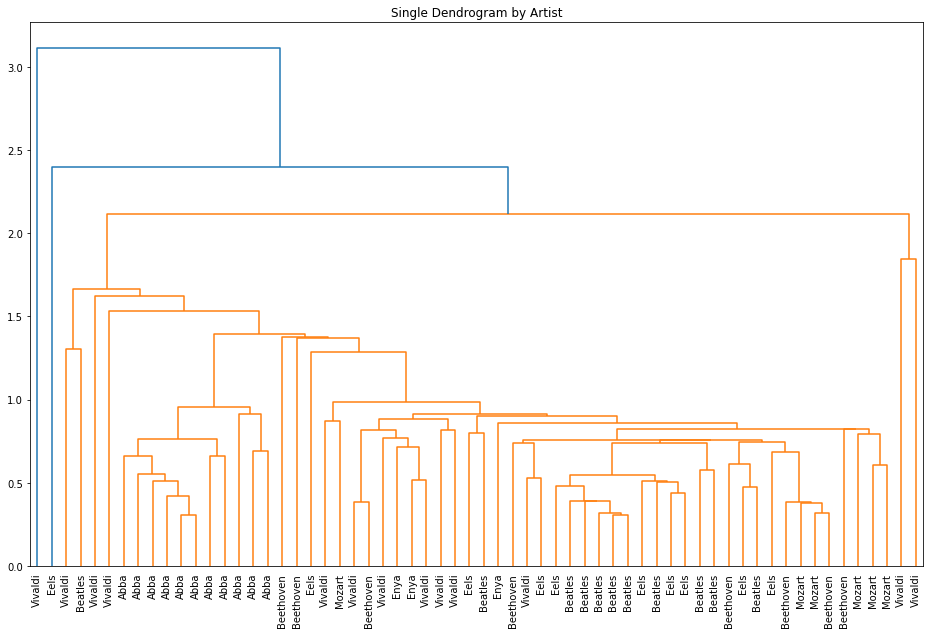

In [204]:
#set target index to "Type"
df=target.set_index('Artist')

#plot 1E dendrogram single linkage by Artist
plt.figure(figsize=(16, 10))  
plt.title("Single Dendrogram by Artist")  
S2 = dendrogram(s_link,labels=df.index,leaf_font_size=10)

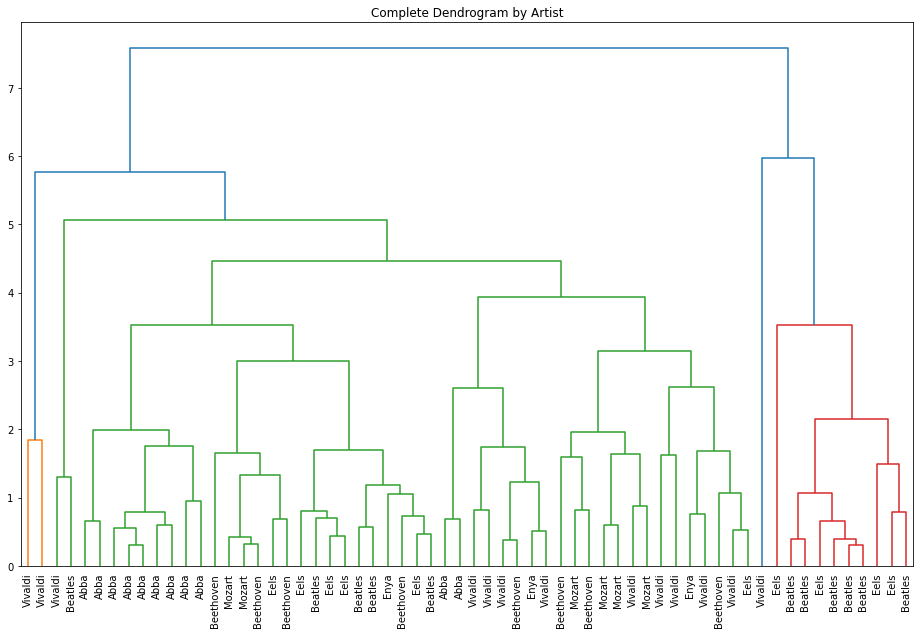

In [205]:
#plot 2E dendrogram complete linkage by Artist
plt.figure(figsize=(16, 10))  
plt.title("Complete Dendrogram by Artist")  
C2 = dendrogram(c_link,labels=df.index,leaf_font_size=10)

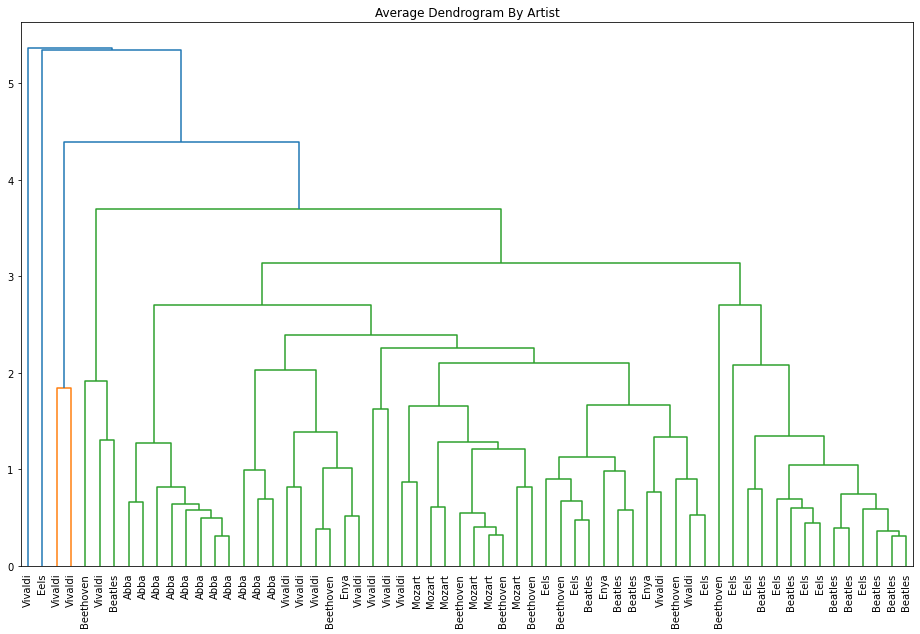

In [206]:
#plot 1E dendrogram average linkage by Artist
plt.figure(figsize=(16, 10))  
plt.title("Average Dendrogram By Artist")  
A2 = dendrogram(a_link, labels=df.index, leaf_font_size=10)

#### Question 2F:
Which method seems best? Explain why.

The complete linkage method seems best. For both dendrograms labeld by "Type" and "Artist" it yielded four clusters.
Compared to the other two methods of linkage they yielded two to three clusters. I would say that a cluster of four would be more precise than a cluster of 2/3. 